# AI-Based Garbage Overflow Prediction System

An intelligent system powered by **Machine Learning (a subset of AI)** that predicts potential garbage bin overflows in different zones of Indore city, helping municipalities optimize waste collection and maintain cleaner urban environments.


## Technologies and Tools Used

- **Python**
- **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**
- **Scikit-learn**
- **Jupyter Notebook / VS Code**


## Data Description

The dataset is randomly generated to simulate garbage bin fill levels and environmental conditions.

| Column | Description |
|--------|-------------|
| `Bin_ID` | Unique ID for each garbage bin |
| `Zone` | Area in Indore |
| `Last_Emptied_Hours_Ago` | Hours since last emptied |
| `Fill_Percent` | Current fill level (%) |
| `Temperature_C` | Temperature in Celsius |
| `Rain` | 1 = Rain, 0 = No Rain |
| `Overflow` | Target: 1 = Overflow, 0 = No Overflow |


In [34]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime


In [35]:
# %%
# Create sample data for Indore bins
zones = ['Rajendra Nagar', 'Silicon City', 'Mhow Naka', 'Annapurna', 'Sudama Nagar',
         'Bhawarkua', 'Palasia', 'Vijay Nagar', 'Rajwada']

np.random.seed(123)

data = {
    'Bin_ID': range(1, 101),
    'Zone': np.random.choice(zones, 100),
    'Last_Emptied_Hours_Ago': np.random.randint(1, 50, 100),
    'Fill_Percent': np.random.randint(10, 100, 100),
    'Temperature_C': np.random.randint(20, 45, 100),
    'Rain': np.random.choice([0, 1], 100),
}

df = pd.DataFrame(data)


In [36]:
# %%
# Create overflow label based on simple logic
overflow_labels = []
for idx, row in df.iterrows():
    if row['Fill_Percent'] > 80 and row['Last_Emptied_Hours_Ago'] > 24:
        overflow_labels.append(1)
    else:
        overflow_labels.append(0)
df['Overflow'] = overflow_labels


In [37]:
# %%
# Prepare features and target variable
features = ['Last_Emptied_Hours_Ago', 'Fill_Percent', 'Temperature_C', 'Rain']
X = df[features]
y = df['Overflow']

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# %%
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Training done! Let’s check how well the model predicts garbage overflow.\n")


Training done! Let’s check how well the model predicts garbage overflow.



In [39]:
# %%
# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[18  0]
 [ 1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



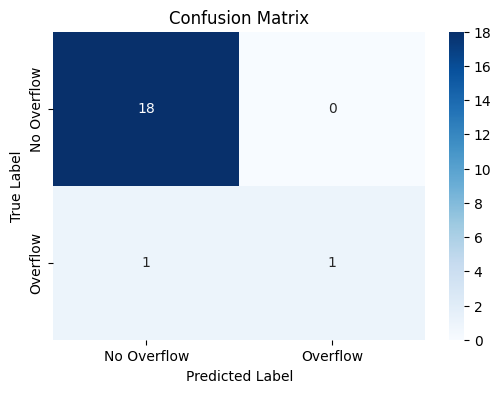

In [40]:
# %%
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Overflow', 'Overflow'], 
            yticklabels=['No Overflow', 'Overflow'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Feature importances — what the model thinks is important:
Fill_Percent              0.606179
Last_Emptied_Hours_Ago    0.273054
Temperature_C             0.099012
Rain                      0.021756
dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_4664\4094166666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')


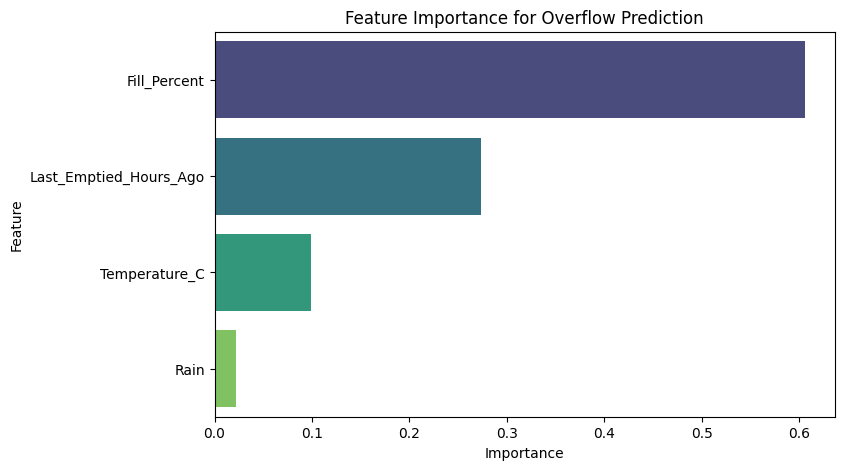

In [41]:
# %%
# Feature importance visualization
feat_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature importances — what the model thinks is important:")
print(feat_importances)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title('Feature Importance for Overflow Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [42]:
# %%
# Add predicted labels to original dataframe
df.loc[X_test.index, 'Predicted_Overflow_Label'] = ['Overflow Expected' if p == 1 else 'No Overflow' for p in y_pred]

print("\nHere’s a quick look at predictions for some bins:\n")
print(df.loc[X_test.index, ['Bin_ID', 'Zone', 'Last_Emptied_Hours_Ago', 'Fill_Percent', 'Predicted_Overflow_Label']].head(10).to_string(index=False))



Here’s a quick look at predictions for some bins:

 Bin_ID           Zone  Last_Emptied_Hours_Ago  Fill_Percent Predicted_Overflow_Label
     84        Palasia                      49            31              No Overflow
     54      Bhawarkua                      47            48              No Overflow
     71      Bhawarkua                      26            39              No Overflow
     46      Annapurna                      25            14              No Overflow
     45        Palasia                      18            94              No Overflow
     40      Mhow Naka                      42            90        Overflow Expected
     23      Mhow Naka                      14            19              No Overflow
     81      Annapurna                      37            68              No Overflow
     11 Rajendra Nagar                      25            55              No Overflow
      1      Mhow Naka                      31            65              No Overflow



Zone-wise Overflow Summary:
Predicted_Overflow_Label  No Overflow  Overflow Expected
Zone                                                    
Annapurna                         5.0                0.0
Bhawarkua                         4.0                0.0
Mhow Naka                         3.0                1.0
Palasia                           3.0                0.0
Rajendra Nagar                    1.0                0.0
Rajwada                           1.0                0.0
Silicon City                      1.0                0.0
Sudama Nagar                      1.0                0.0


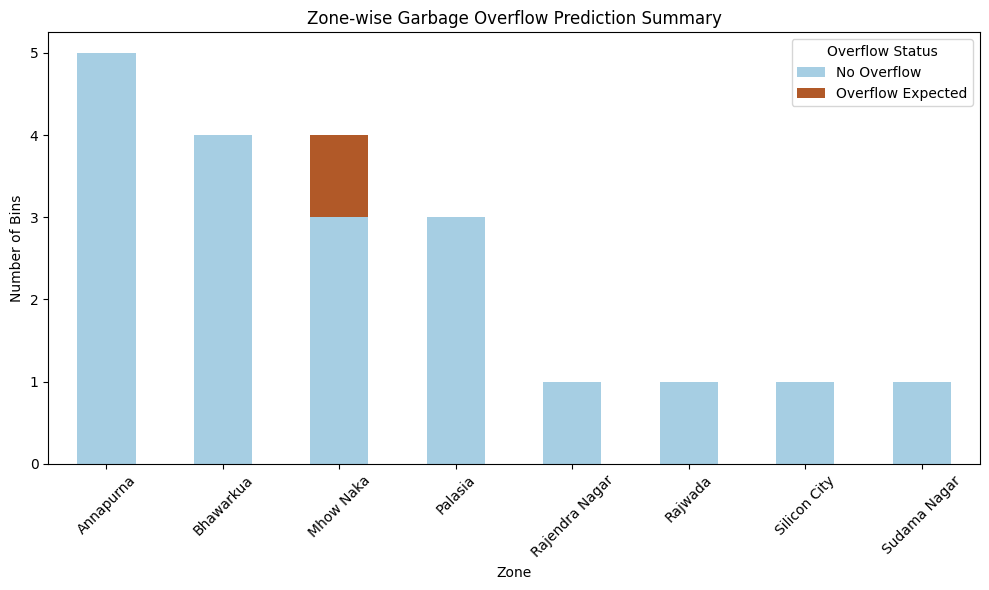

In [43]:
# %%
# Zone-wise summary of predictions
zone_summary = df.loc[X_test.index].groupby('Zone')['Predicted_Overflow_Label'].value_counts().unstack().fillna(0)
print("\nZone-wise Overflow Summary:")
print(zone_summary)

# Plot zone-wise summary bar chart
zone_summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Zone-wise Garbage Overflow Prediction Summary')
plt.xlabel('Zone')
plt.ylabel('Number of Bins')
plt.xticks(rotation=45)
plt.legend(title='Overflow Status')
plt.tight_layout()
plt.show()


In [44]:
# %%
print(f"\nReport generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")



Report generated on: 2025-05-30 23:28:22
